In [222]:
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
print(help(api))

Help on REST in module alpaca_trade_api.rest object:

class REST(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, key_id=None, secret_key=None, base_url=None, api_version=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cancel_order(self, order_id)
 |      Cancel an order
 |  
 |  data_get(self, path, data=None)
 |  
 |  delete(self, path, data=None)
 |  
 |  get(self, path, data=None)
 |  
 |  get_account(self)
 |      Get the account
 |  
 |  get_asset(self, symbol)
 |      Get an asset
 |  
 |  get_barset(self, symbols, timeframe, limit=None, start=None, end=None, after=None, until=None)
 |      Get BarSet(dict[str]->list[Bar])
 |      The parameter symbols can be either a comma-split string
 |      or a list of string. Each symbol becomes the key of
 |      the returned value.
 |  
 |  get_calendar(self, start=None, end=None)
 |  
 |  get_clock(self)
 |  
 |  get_order(self, order_id)
 |      Get an order
 |  
 |  get_order_by_

# Trading bot using Naive_bayes for decision making
We will build a trading bot using alpaca api and a single machine learning method to make trading decisions. 
This will be a long term trading bot not a HFT or day trading bot.

Alpaca Dashboard: 
https://app.alpaca.markets/paper/dashboard/overview

# Agent
Sources:

https://github.com/alpacahq/alpaca-trade-api-python 

https://docs.alpaca.markets/api-documentation/

https://hackernoon.com/easily-build-a-stock-trading-bot-using-broker-api-6bfbdc8d48c9

To Do List:
- [x] Connect to api
- [X] Make a trade
- [X] Make a bot to do a few trades during the day
- [ ] Check that bot is working properly after a few days


In [268]:
class Agent():
    def __init__(self):
        base_url = 'https://paper-api.alpaca.markets'
        api_key_id = 'PK8LYLKXCSISIGSFLFE7'
        api_secret = 'YN7ovahTowJqcaHSDBNQx92P738lIfViSnhAXosa'

        api = tradeapi.REST(
            base_url=base_url,
            key_id=api_key_id,
            secret_key=api_secret
        )
        account = api.get_account()
        assets = api.list_assets()
        print("Status: ", account.status)
        print("Cash: $", account.cash)
        print('Clock: ', api.get_clock())
    
    def status(self):
        '''
        Return:
            - Displays status of agent
        '''
        print('Market Status: ', api.get_clock())
        print("Status: ", account.status)
        print("Positions: ", api.list_positions())
        
    def get_stock_status(self, symbol):
        for exchange in assets:
            if exchange.symbol == symbol:
                print(exchange)
                
    def get_orders(self):
        '''
        Return: 
            - List of currently placed orders
        '''
        return api.list_orders()
    
    def get_positions(self):
        '''
        Return: 
            - List of currently owned positions
        '''
        return api.list_positions()
        
        
    def get_stock_history(self, symbol, time):
        '''
        Parameters:
            symbol - stock symbol for lookupo
            time - time symbol (e.g minute, 1Min, 5Min, 15Min, day or 1D. minute)
        Return:
            - displays plots of Open vs Close, High vs Low      
        '''
        tsla_data = api.get_barset(symbol , time, limit = 100).df['TSLA']
        tsla_data['open'].plot()
        tsla_data['close'].plot()
        plt.title('open vs close')
        plt.show()
        tsla_data['high'].plot()
        tsla_data['low'].plot()
        plt.title('High vs Low')
        plt.show()   
        
    def order(self, symbol, quantity, time_in_force):
        '''
        Parameters:
            symbol - stock symbol for lookupo
            quantity - how many stocks you are buying
            time_in_force - Order type
                1. dat: The order is good for the day, and it will be canceled automatically at the end of Regular Trading Hours if unfilled.
                2. gtc: The order is good until canceled.
                3. opg: The order is placed at the time the market opens. The order will be accepted if it is received before 9:15AM (ET). 
                        The order can be cancelled after 9:15AM, but it cannot be edited. After 9:28AM, OPG orders cannot be edited or cancelled.
                        Any unfilled orders after opening of the market will be cancelled. 
                        If you submit OPG orders during the market hours, it will appear as “rejected” in your dashboard.
        Return:
            order - contents and status of the order placed witht the call
        '''
        order = api.submit_order(symbol, quantity,'buy','market',time_in_force)
        return order
    
    def sell(self, symbol, quantity, time_in_force):
        '''
        Parameters:
            symbol - stock symbol for lookupo
            quantity - how many stocks you are buying
            time_in_force - Order type
                1. dat
                2. gtc
                3. opg
        Return:
            order - contents and status of the order placed witht the call
        '''
        try:
            openPosition = api.get_position(symbol)
            order = api.submit_order(symbol, openPosition,'sell','market',time_in_force)
            return order
        except:
            print("No position to sell")
            return null

agent = Agent()

Status:  ACTIVE
Cash: $ 100000
Clock:  Clock({   'is_open': False,
    'next_close': '2019-03-11T16:00:00-04:00',
    'next_open': '2019-03-11T09:30:00-04:00',
    'timestamp': '2019-03-10T00:42:41.198345825-05:00'})


In [260]:
agent.status()
agent.get_stock_status('TSLA')

Market Status:  Clock({   'is_open': False,
    'next_close': '2019-03-11T16:00:00-04:00',
    'next_open': '2019-03-11T09:30:00-04:00',
    'timestamp': '2019-03-10T00:38:18.317019639-05:00'})
Status:  ACTIVE
Positions:  []
Asset({   'asset_class': 'us_equity',
    'exchange': 'NASDAQ',
    'id': '8ccae427-5dd0-45b3-b5fe-7ba5e422c766',
    'status': 'active',
    'symbol': 'TSLA',
    'tradable': True})


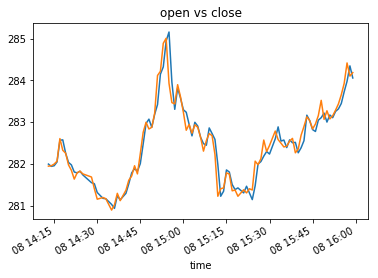

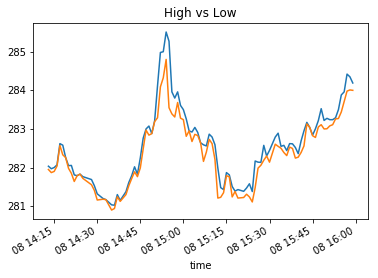

In [266]:
checked = []
for order in agent.get_orders():
    if order.symbol not in checked:
        agent.get_stock_history(order.symbol , 'minute')
    checked.append(order.symbol)

In [137]:
agent.order('TSLA', 1, 'gtc')
agent.sell('TSLA', 1, 'gtc')

# Strategist 
Sources: 

https://github.com/huseinzol05/Stock-Prediction-Models#agents

To Do List:
- [ ] setup basic model
- [ ] get model working with stock of choice
- [ ] connect bot to trading agent
- [ ] get bot making day trades ( can be positive or negative outcome)
- [ ] Optimize that bish


In [254]:
order

Order({   'asset_class': 'us_equity',
    'asset_id': '8ccae427-5dd0-45b3-b5fe-7ba5e422c766',
    'canceled_at': None,
    'client_order_id': 'a3c3df84-8cb8-4551-a7cf-c63bb6df6f20',
    'created_at': '2019-03-10T04:22:57.75601Z',
    'expired_at': None,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'id': '35ddc6a5-5333-4ffb-bf1a-3f072a7972b8',
    'limit_price': None,
    'order_type': 'market',
    'qty': '1',
    'side': 'buy',
    'status': 'new',
    'stop_price': None,
    'submitted_at': '2019-03-10T04:22:57.751983Z',
    'symbol': 'TSLA',
    'time_in_force': 'gtc',
    'type': 'market',
    'updated_at': '2019-03-10T04:22:57.761972Z'})